In [75]:
import pandas as pd
import numpy as np
import imblearn

from imblearn.under_sampling import RandomUnderSampler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split, KFold
from sklearn.utils import shuffle
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import MinMaxScaler

In [7]:
features = pd.read_csv('smoking.csv')

In [8]:
features.head(10)

,ID,gender,age,height(cm),weight(kg),waist(cm),eyesight(left),eyesight(right),hearing(left),hearing(right),...,hemoglobin,Urine protein,serum creatinine,AST,ALT,Gtp,oral,dental caries,tartar,smoking
0,0,F,40,155,60,81.3,1.2,1.0,1.0,1.0,...,12.9,1.0,0.7,18.0,19.0,27.0,Y,0,Y,0
1,1,F,40,160,60,81.0,0.8,0.6,1.0,1.0,...,12.7,1.0,0.6,22.0,19.0,18.0,Y,0,Y,0
2,2,M,55,170,60,80.0,0.8,0.8,1.0,1.0,...,15.8,1.0,1.0,21.0,16.0,22.0,Y,0,N,1
3,3,M,40,165,70,88.0,1.5,1.5,1.0,1.0,...,14.7,1.0,1.0,19.0,26.0,18.0,Y,0,Y,0
4,4,F,40,155,60,86.0,1.0,1.0,1.0,1.0,...,12.5,1.0,0.6,16.0,14.0,22.0,Y,0,N,0
5,5,M,30,180,75,85.0,1.2,1.2,1.0,1.0,...,16.2,1.0,1.2,18.0,27.0,33.0,Y,0,Y,0
6,6,M,40,160,60,85.5,1.0,1.0,1.0,1.0,...,17.0,1.0,0.7,21.0,27.0,39.0,Y,1,Y,1
7,7,M,45,165,90,96.0,1.2,1.0,1.0,1.0,...,15.0,1.0,1.3,38.0,71.0,111.0,Y,0,Y,0
8,9,F,50,150,60,85.0,0.7,0.8,1.0,1.0,...,13.7,1.0,0.8,31.0,31.0,14.0,Y,0,N,0
9,10,M,45,175,75,89.0,1.0,1.0,1.0,1.0,...,16.0,1.0,0.8,26.0,24.0,63.0,Y,0,N,0


In [9]:
#list(features.columns)

In [10]:
features = features.replace('N', 0)
features = features.replace('Y', 1)
features = features.replace('F', 0)
features = features.replace('M', 1)

In [11]:
features = features.drop('ID', axis = 1)

In [12]:
print(features['smoking'].unique())
#np.count_nonzero(labels)

[0 1]


In [13]:
features['smoking'].value_counts()

0    35237
1    20455
Name: smoking, dtype: int64

In [14]:
features[features == np.inf] = np.nan

In [15]:
features.isnull().values.any()

False

In [16]:
features.fillna(features.mean(), inplace=True)

In [17]:
features = shuffle(features)

In [18]:
labels = np.array(features['smoking'])

In [19]:
features = features.drop('smoking', axis = 1)

In [20]:
#features_list = list(features.columns)

In [21]:
features1 = np.array(features)

In [22]:
#realiza o undersampling "manualmente"
sampling_strategy = {0: 20000, 1: 20000}
rus = RandomUnderSampler(sampling_strategy=sampling_strategy)
features1, labels = rus.fit_resample(features1, labels)

In [23]:
#checa quantidade de instancias de cada classe geral
np.unique(labels, return_counts=True)
np.unique(features1, return_counts=True)

(array([0.000e+00, 1.000e-01, 2.000e-01, ..., 1.860e+03, 2.062e+03,
        2.914e+03]),
 array([60112,   521,   678, ...,     1,     1,     1]))

# KNN

In [77]:
# define min max scaler
scaler = MinMaxScaler()
# normaliza os dados
scaled = scaler.fit_transform(features1)

In [78]:
train_features, test_features, train_labels, test_labels = train_test_split(scaled, labels, test_size = 0.3, shuffle=True)
#checa quantidade de instancias de cada classe do teste/treino
print(np.unique(train_labels, return_counts=True))
print(np.unique(test_labels, return_counts=True))

(array([0, 1]), array([14049, 13951]))
(array([0, 1]), array([5951, 6049]))


In [69]:
knn = KNeighborsClassifier(n_neighbors = 9)
knn.fit(train_features, train_labels)

KNeighborsClassifier(n_neighbors=9)

In [70]:
predictions_knn = knn.predict(test_features)

In [71]:
accuracy_knn = accuracy_score(test_labels, predictions_knn)
precision_knn = precision_score(test_labels, predictions_knn)

In [72]:
print("Accuracy KNN: ", round(accuracy_knn, 5))
print("Precision KNN: ", round(precision_knn, 5))

Accuracy KNN:  0.74508
Precision KNN:  0.71611


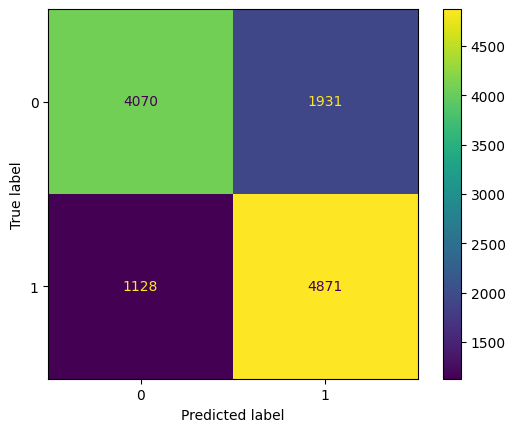

In [73]:
cm = confusion_matrix(test_labels, predictions_knn)

ConfusionMatrixDisplay(confusion_matrix=cm).plot();

# Random Forest

In [79]:
train_features, test_features, train_labels, test_labels = train_test_split(features1, labels, test_size = 0.3, shuffle=True)
#checa quantidade de instancias de cada classe do teste/treino
print(np.unique(train_labels, return_counts=True))
print(np.unique(test_labels, return_counts=True))

(array([0, 1]), array([13967, 14033]))
(array([0, 1]), array([6033, 5967]))


In [80]:
rf = RandomForestClassifier(n_estimators=200, n_jobs=3)

In [81]:
rf.fit(train_features, train_labels)

RandomForestClassifier(n_estimators=200, n_jobs=3)

In [82]:
predictions = rf.predict(test_features)

In [83]:
accuracy_rf = accuracy_score(test_labels, predictions)
precision_rf = precision_score(test_labels, predictions)

In [84]:
print("Accuracy RF: ", round(accuracy_rf, 5))
print("Precision RF: ", round(precision_rf, 5))

Accuracy RF:  0.80967
Precision RF:  0.75453


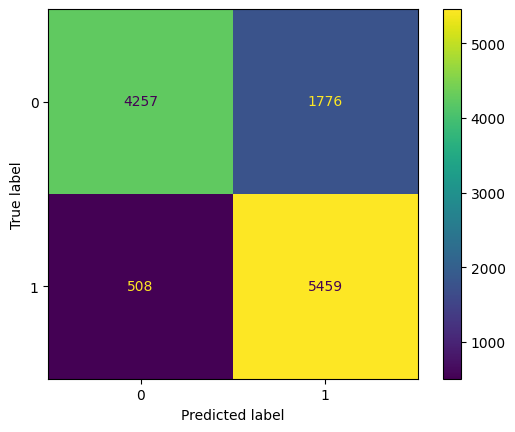

In [85]:
cm = confusion_matrix(test_labels, predictions)

ConfusionMatrixDisplay(confusion_matrix=cm).plot();

# K-Fold

In [76]:
kFold = KFold(n_splits=5,shuffle=True)
for train_index,test_index in kFold.split(features1):
    print("Train Index: ", train_index)
    print("Test Index: ", test_index)

    X_train, X_test, y_train, y_test = features1[train_index], features1[test_index], labels[train_index], labels[test_index]
    rf.fit(X_train, y_train)
    predictions = rf.predict(X_test)
    print("Accuracy: ", round(accuracy_score(y_test, predictions), 5), "\n")
    print("Precision: ", round(precision_score(y_test, predictions), 5), "\n")

Train Index:  [    0     1     2 ... 39997 39998 39999]
Test Index:  [    6     7     9 ... 39986 39987 39988]
Accuracy:  0.81025 

Precision:  0.75639 

Train Index:  [    0     1     2 ... 39994 39997 39998]
Test Index:  [    8    12    19 ... 39995 39996 39999]
Accuracy:  0.81438 

Precision:  0.76194 

Train Index:  [    0     1     2 ... 39996 39997 39999]
Test Index:  [    5    11    14 ... 39983 39990 39998]
Accuracy:  0.81475 

Precision:  0.761 

Train Index:  [    2     3     4 ... 39996 39998 39999]
Test Index:  [    0     1    13 ... 39976 39978 39997]
Accuracy:  0.81712 

Precision:  0.76749 

Train Index:  [    0     1     5 ... 39997 39998 39999]
Test Index:  [    2     3     4 ... 39992 39993 39994]
Accuracy:  0.81612 

Precision:  0.76474 



In [86]:
kFold = KFold(n_splits=5,shuffle=True)
for train_index,test_index in kFold.split(scaled):
    print("Train Index: ", train_index)
    print("Test Index: ", test_index)

    X_train, X_test, y_train, y_test = scaled[train_index], scaled[test_index], labels[train_index], labels[test_index]
    knn.fit(X_train, y_train)
    predictions = knn.predict(X_test)
    print("Accuracy: ", round(accuracy_score(y_test, predictions), 5), "\n")
    print("Precision: ", round(precision_score(y_test, predictions), 5), "\n")

Train Index:  [    0     1     2 ... 39996 39998 39999]
Test Index:  [    9    23    24 ... 39988 39991 39997]
Accuracy:  0.74388 

Precision:  0.71096 

Train Index:  [    0     1     2 ... 39997 39998 39999]
Test Index:  [    8    12    14 ... 39984 39985 39994]
Accuracy:  0.74412 

Precision:  0.71798 

Train Index:  [    0     3     4 ... 39997 39998 39999]
Test Index:  [    1     2     5 ... 39986 39989 39992]
Accuracy:  0.74275 

Precision:  0.71387 

Train Index:  [    0     1     2 ... 39996 39997 39998]
Test Index:  [    3     7    11 ... 39990 39993 39999]
Accuracy:  0.74262 

Precision:  0.70998 

Train Index:  [    1     2     3 ... 39994 39997 39999]
Test Index:  [    0     4     6 ... 39995 39996 39998]
Accuracy:  0.74875 

Precision:  0.72487 

